**Performing RFM Segmentation on a Simple Grocery Dataset**
# *Customer Segementation and Analysis using RFM & K-means*

In [ ]:
# Import necessary libraries
import pandas as pd
import sqlite3

# Load the data into a pandas DataFrame
Groceries_df = pd.read_csv('Groceries_dataset.csv')

In [ ]:
# Display the dataset
Groceries_df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
# Checking for missing values in the data
missing_values = Groceries_df.isna().sum()
print("Missing Values:")
print(missing_values)


# Convert the Date attribute to a datetime object for processing
Groceries_df['Date'] = pd.to_datetime(Groceries_df['Date'], infer_datetime_format=True)
Groceries_df.head()


Missing Values:
Member_number      0
Date               0
itemDescription    0
dtype: int64


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [ ]:
# Calculate the distribution of items purchased
item_distribution = Groceries_df['itemDescription'].value_counts().reset_index()
item_distribution.columns = ['itemDescription', 'count']

# Calculate the distribution of transactions per customer
transactions_per_customer = Groceries_df.groupby('Member_number')['Date'].nunique().reset_index()
transactions_per_customer.columns = ['Member_number', 'num_transactions']


In [ ]:
# Print the first few rows of item_distribution
print("Item Distribution:")
print(item_distribution.head(5))

# Print the first few rows of transactions_per_customer
print("\nTransactions per Customer:")
print(transactions_per_customer.head(5))


Item Distribution:
    itemDescription  count
0        whole milk   2502
1  other vegetables   1898
2        rolls/buns   1716
3              soda   1514
4            yogurt   1334

Transactions per Customer:
   Member_number  num_transactions
0           1000                 5
1           1001                 5
2           1002                 4
3           1003                 4
4           1004                 8


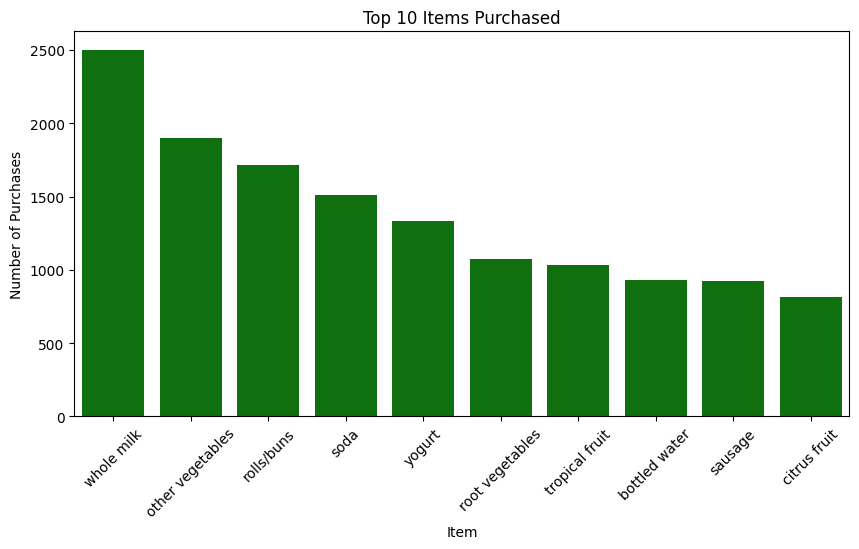

In [ ]:
# Visualizing the item distribution

import matplotlib.pyplot as plt
import seaborn as sns

top_items = item_distribution.head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='itemDescription', y='count', data=top_items, color='green')
plt.title('Top 10 Items Purchased')
plt.xlabel('Item')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

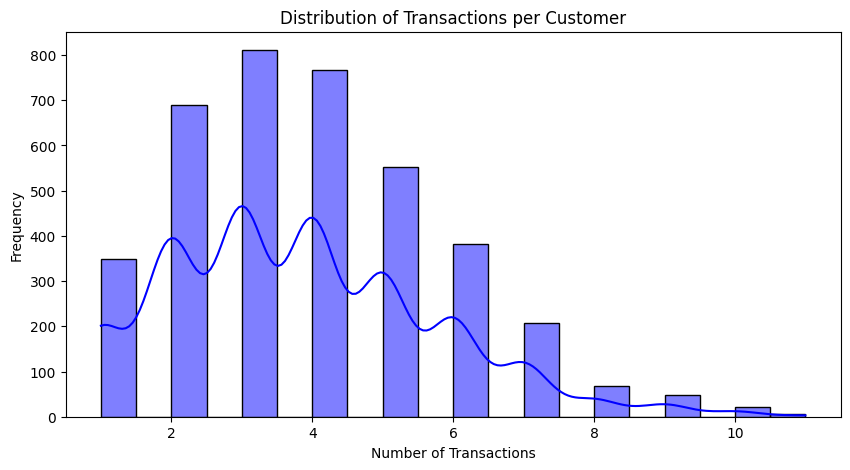

In [ ]:

# Visualize the distribution of transactions per customer

plt.figure(figsize=(10, 5))
sns.histplot(transactions_per_customer['num_transactions'], kde=True, bins=20, color='blue')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np
# Calculate the total number of customers
total_customers = len(transactions_per_customer)

In [ ]:
# Calculate basic statistics for the original data
Groceries_df['Date'].describe()



<ipython-input-42-ba9257b9a896>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Groceries_df['Date'].describe()


count                   38765
unique                    728
top       2015-01-21 00:00:00
freq                       96
first     2014-01-01 00:00:00
last      2015-12-30 00:00:00
Name: Date, dtype: object

In [ ]:
# Calculate statistical analysis for transactions per customer
transactions = transactions_per_customer['num_transactions'].describe()

transactions

count    3898.000000
mean        3.838635
std         1.883678
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        11.000000
Name: num_transactions, dtype: float64

In [ ]:
# Grouping the data by Date and counting the number of transactions for each date and printing the results below
transactions_per_day = Groceries_df.groupby('Date').size().reset_index(name='num_transactions')
average_transactions_per_day = transactions_per_day['num_transactions'].mean()

print("Average number of transactions per day:", average_transactions_per_day)


Average number of transactions per day: 53.24862637362637


In [ ]:
# Connect to a SQLite3 database
conn = sqlite3.connect('Groceries_RFM.db' )
cur = conn.cursor() 


In [ ]:
# Write the cleaned DataFrame to a new table in the newly created database
Groceries_df.to_sql('Transactions', conn, if_exists='replace', index=False)


38765

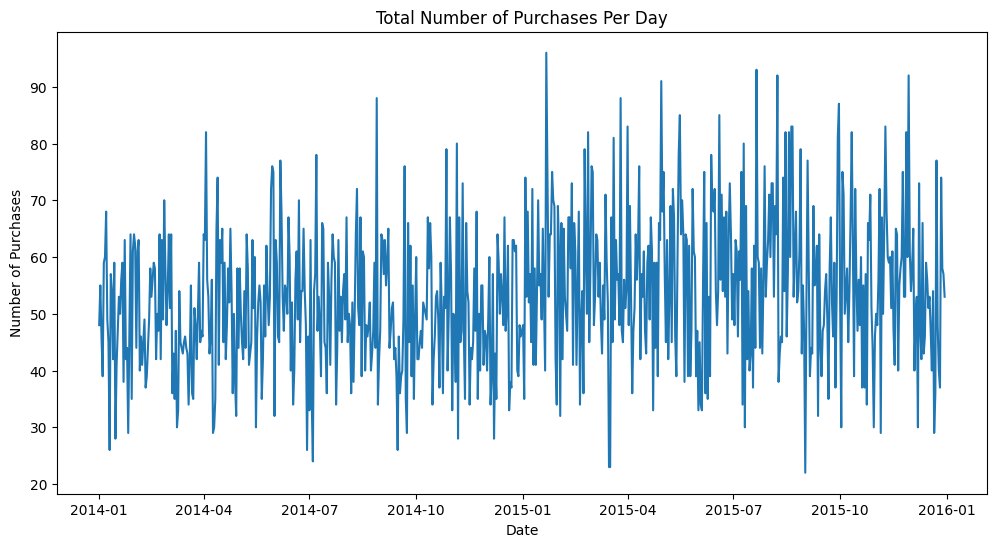

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by Date and count the number of purchases for each date
purchases_by_date = Groceries_df.groupby('Date').size().reset_index(name='num_purchases')

# Create a time series plot of the total number of purchases by date
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='num_purchases', data=purchases_by_date)
plt.title('Total Number of Purchases Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()


In [ ]:
num_users = Groceries_df['Member_number'].nunique()
print(f"Number of unique users: {num_users}")


num_itemsxxc = Groceries_df['itemDescription'].nunique()
print(f"Number of unique Items: {num_itemsxxc}")

Number of unique users: 3898
Number of unique Items: 167


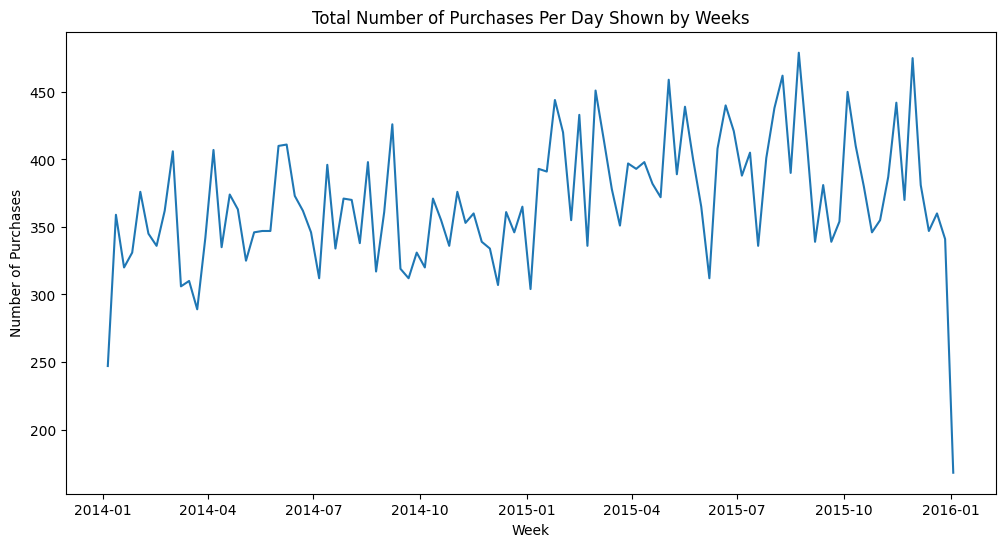

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by Date and count the number of purchases for each date
purchases_by_date =  Groceries_df.groupby('Date').size().reset_index(name='num_purchases')

# Set Date as index and resample to weekly frequency
purchases_by_date.set_index('Date', inplace=True)
purchases_by_week = purchases_by_date.resample('W').sum().reset_index()

# Create a time series plot of the total number of purchases by week
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='num_purchases', data=purchases_by_week)
plt.title('Total Number of Purchases Per Day Shown by Weeks')
plt.xlabel('Week')
plt.ylabel('Number of Purchases')
plt.show()


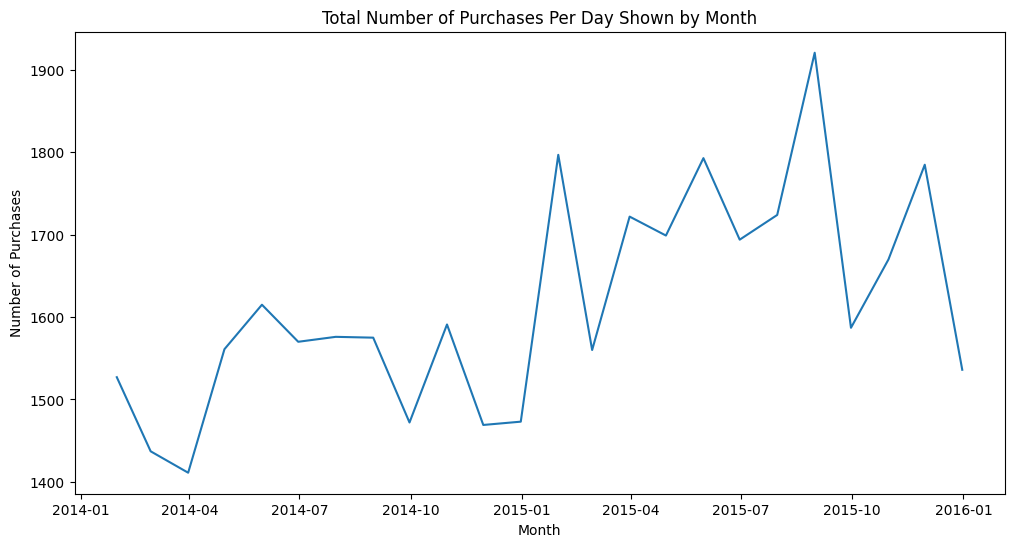

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group the data by Date and count the number of purchases for each date
purchases_by_date =  Groceries_df.groupby('Date').size().reset_index(name='num_purchases')

# Set Date as index and resample to monthly frequency
purchases_by_date.set_index('Date', inplace=True)
purchases_by_month = purchases_by_date.resample('M').sum().reset_index()

# Create a time series plot of the total number of purchases by month
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Date', y='num_purchases', data=purchases_by_month)
plt.title('Total Number of Purchases Per Day Shown by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')

plt.show()


In [ ]:
import datetime
# Set the analysis date (use the latest date in the dataset + 1 day)
date =  Groceries_df['Date'].max() + datetime.timedelta(days=1)


In [ ]:
# SQL query to calculate Recency, Frequency, and Monetary values for each customer
rfm_query = '''
SELECT
  Member_number,
  julianday('2015-12-31') - julianday(MAX(Date)) AS Recency,
  COUNT(DISTINCT Date) AS Frequency,
  COUNT(*) AS Monetary
FROM
  Transactions
GROUP BY
  Member_number
'''

rfm_data = pd.read_sql_query(rfm_query, conn)

# Display the first 10 rows of the RFM DataFrame
print(rfm_data.head(10))


   Member_number  Recency  Frequency  Monetary
0           1000     36.0          5        13
1           1001    243.0          5        12
2           1002    123.0          4         8
3           1003    324.0          4         8
4           1004     29.0          8        21
5           1005    707.0          2         4
6           1006    200.0          4        15
7           1008     89.0          2        12
8           1009     87.0          4         9
9           1010    153.0          5        12


In [ ]:
selected_members = rfm_data[rfm_data['Member_number'].isin([1024, 1090])]
print(selected_members)


    Member_number  Recency  Frequency  Monetary
23           1024    143.0          1         4
87           1090     71.0          3        12


In [ ]:
member_1090_frequency = rfm_data.loc[rfm_data['Member_number'] == 1090, 'Frequency'].iloc[0]
print(f"Member 1090 bought items {member_1090_frequency} times.")


Member 1090 bought items 3 times.


In [ ]:
# Assign RFM scores for Recency, Frequency, and Monetary
rfm_data['Recency_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=list(range(4, 0, -1)))
rfm_data['Frequency_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=list(range(1, 5)))
rfm_data['Monetary_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=list(range(1, 5)))


In [ ]:
# Concatenate RFM scores as strings
rfm_data['RFM_Score'] = rfm_data['Recency_Score'].astype(str) + rfm_data['Frequency_Score'].astype(str) + rfm_data['Monetary_Score'].astype(str)


In [ ]:
# Define a function to categorize members based on their RFM scores
def rfm_level(df):
    if df['RFM_Score'] == '444':
        return 'Best Customers'
    elif df['RFM_Score'][0] >= '3' and df['RFM_Score'][1] >= '3' and df['RFM_Score'][2] >= '3':
        return 'Loyal'
    elif df['RFM_Score'][0] >= '3' and df['RFM_Score'][1] >= '1' and df['RFM_Score'][2] >= '2':
        return 'Potential Loyalist'
    elif df['RFM_Score'][0] >= '3' and df['RFM_Score'][1] >= '1' and df['RFM_Score'][2] >= '1':
        return 'Promising'
    elif df['RFM_Score'][0] >= '2' and df['RFM_Score'][1] >= '2' and df['RFM_Score'][2] >= '2':
        return 'Customers Needing Attention'
    elif df['RFM_Score'][0] >= '1' and df['RFM_Score'][1] >= '2' and df['RFM_Score'][2] >= '2':
        return 'At Risk'
    elif df['RFM_Score'][0] >= '1' and df['RFM_Score'][1] >= '1' and df['RFM_Score'][2] >= '2':
        return 'Hibernating'
    else:
        return 'Lost'

# Apply the function to the RFM DataFrame
rfm_data['RFM_Level'] = rfm_data.apply(rfm_level, axis=1)

# Display the first 10 rows of the RFM DataFrame
print(rfm_data.head(10))


   Member_number  Recency  Frequency  Monetary Recency_Score Frequency_Score  \
0           1000     36.0          5        13             4               3   
1           1001    243.0          5        12             2               3   
2           1002    123.0          4         8             3               2   
3           1003    324.0          4         8             1               2   
4           1004     29.0          8        21             4               4   
5           1005    707.0          2         4             1               1   
6           1006    200.0          4        15             2               2   
7           1008     89.0          2        12             3               1   
8           1009     87.0          4         9             3               2   
9           1010    153.0          5        12             2               3   

  Monetary_Score RFM_Score                    RFM_Level  
0              3       433                        Loyal  
1  

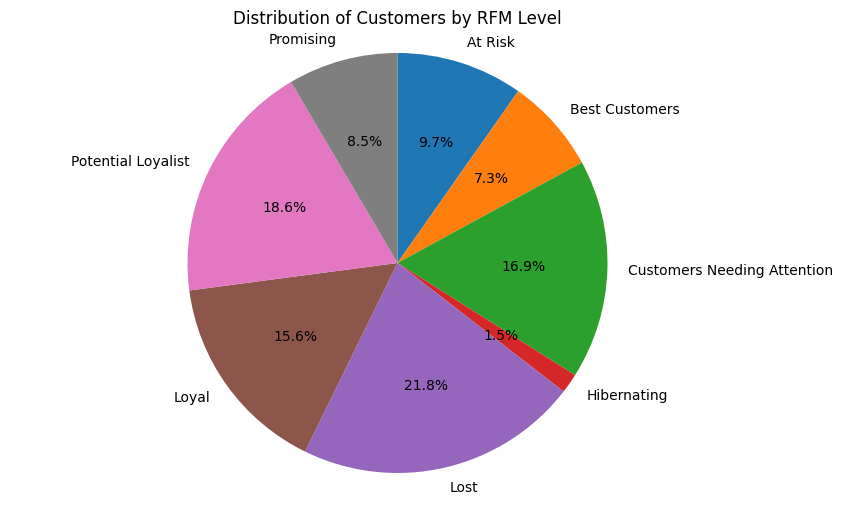

In [ ]:
# Count the number of customers in each RFM level
rfm_level_counts = rfm_data.groupby('RFM_Level')['Member_number'].count().reset_index()

# Plot pie chart with annotated labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(
    rfm_level_counts['Member_number'],
    labels=rfm_level_counts['RFM_Level'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Distribution of Customers by RFM Level')
plt.show()


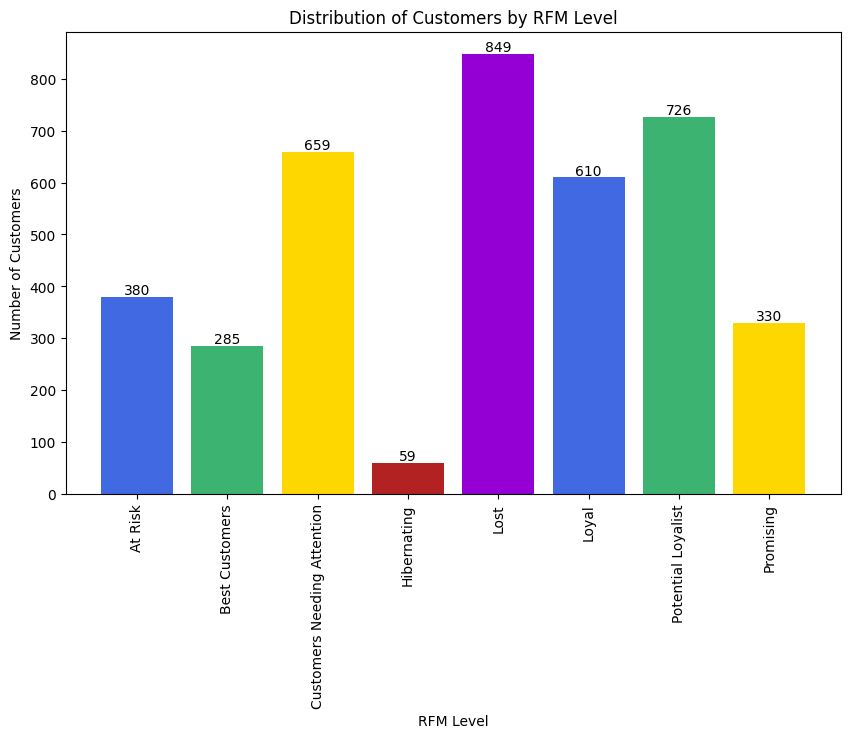

In [ ]:
# Count the number of customers in each RFM level
rfm_level_counts = rfm_data.groupby('RFM_Level')['Member_number'].count().reset_index()

# Define colors for each RFM level
colors = ['royalblue', 'mediumseagreen', 'gold', 'firebrick', 'darkviolet']

# Create a column chart with different colors for each bar
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    rfm_level_counts['RFM_Level'],
    rfm_level_counts['Member_number'],
    color=colors
)

# Add labels and formatting
plt.title('Distribution of Customers by RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

# Annotate the bars with the number of customers
for i, v in enumerate(rfm_level_counts['Member_number']):
    ax.text(i, v + 5, str(v), ha='center')


plt.show()


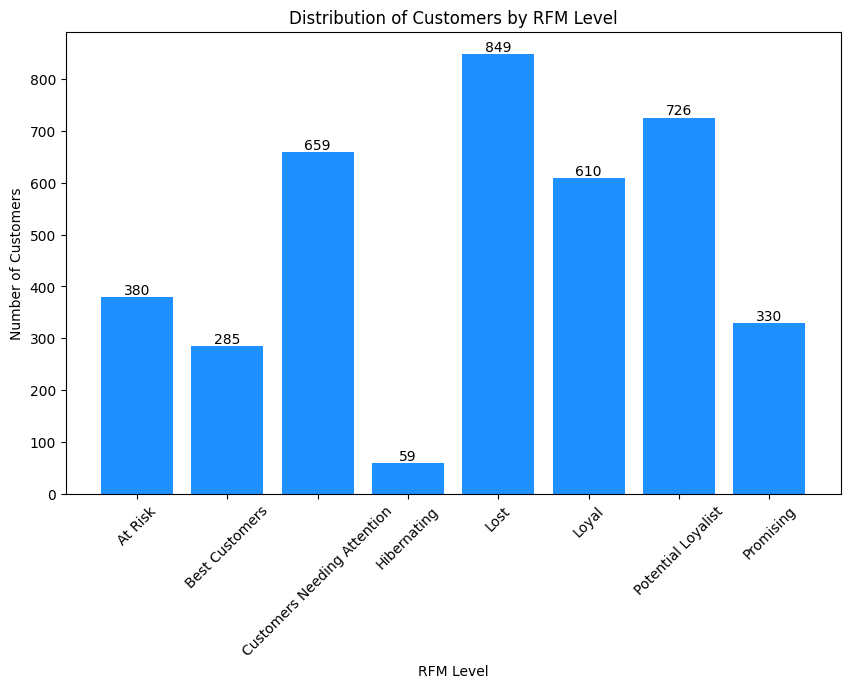

In [ ]:
# Create a bar chart for the distribution of customers by RFM level
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    rfm_level_counts['RFM_Level'],
    rfm_level_counts['Member_number'],
    color='dodgerblue'
)

# Add labels and title
plt.xlabel('RFM Level')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by RFM Level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate the bars with the number of customers
for i, v in enumerate(rfm_level_counts['Member_number']):
    ax.text(i, v + 5, str(v), ha='center')

plt.show()


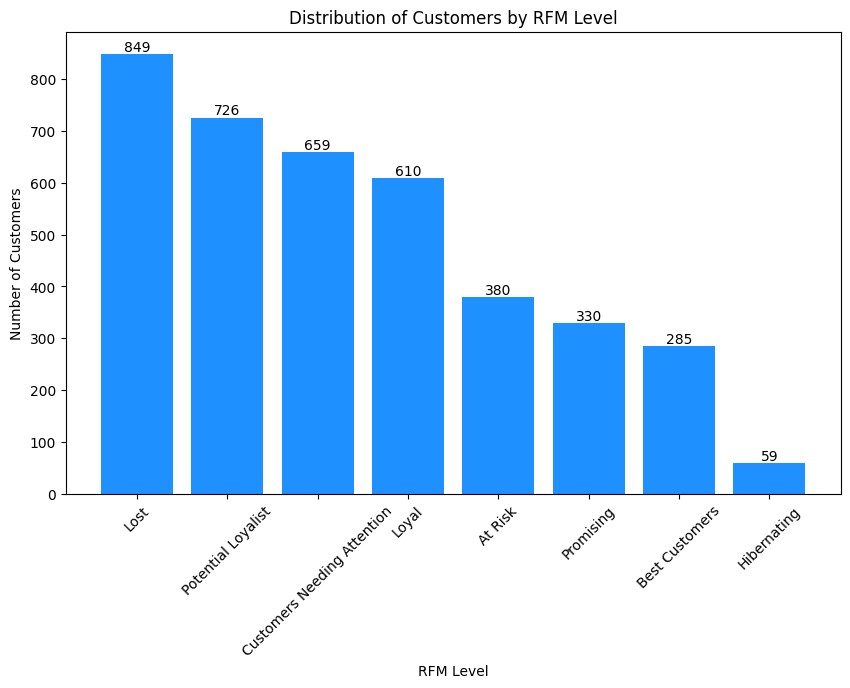

In [ ]:
# Sort the rfm_level_counts DataFrame by the number of customers in descending order
rfm_level_counts_sorted = rfm_level_counts.sort_values('Member_number', ascending=False)

# Create a bar chart for the distribution of customers by RFM level
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    rfm_level_counts_sorted['RFM_Level'],
    rfm_level_counts_sorted['Member_number'],
    color='dodgerblue'
)

# Add labels and title
plt.xlabel('RFM Level')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by RFM Level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate the bars with the number of customers
for i, v in enumerate(rfm_level_counts_sorted['Member_number']):
    ax.text(i, v + 5, str(v), ha='center')

plt.show()


Text(0.5, 1.0, 'Histogram and Recency')

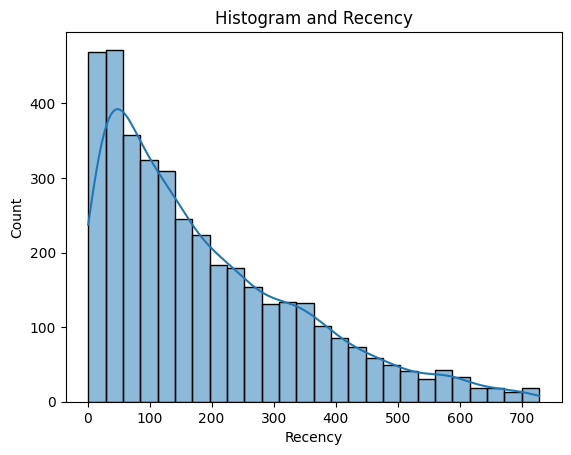

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=rfm_data, x='Recency', kde=True)
ax.set_title('Histogram and Recency')

Text(0.5, 1.0, 'Histogram and Frequency')

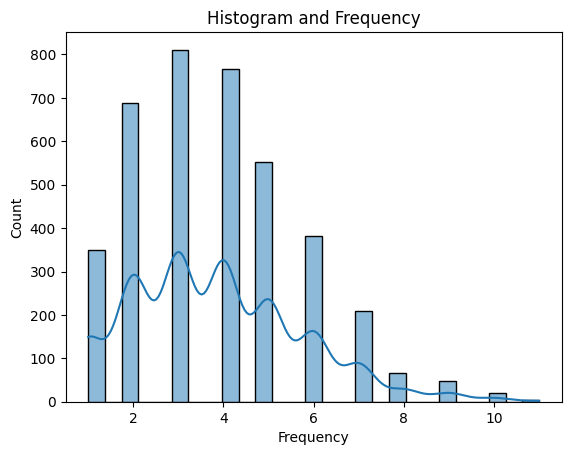

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=rfm_data, x='Frequency', kde=True)
ax.set_title('Histogram and Frequency')

Text(0.5, 1.0, 'Histogram and MonetaryValue')

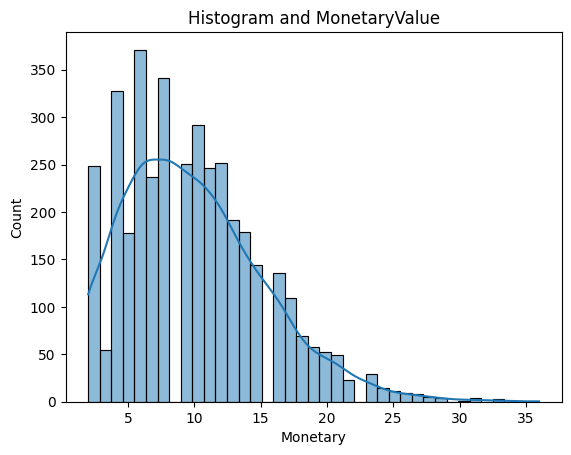

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=rfm_data, x='Monetary', kde=True)
ax.set_title('Histogram and MonetaryValue')

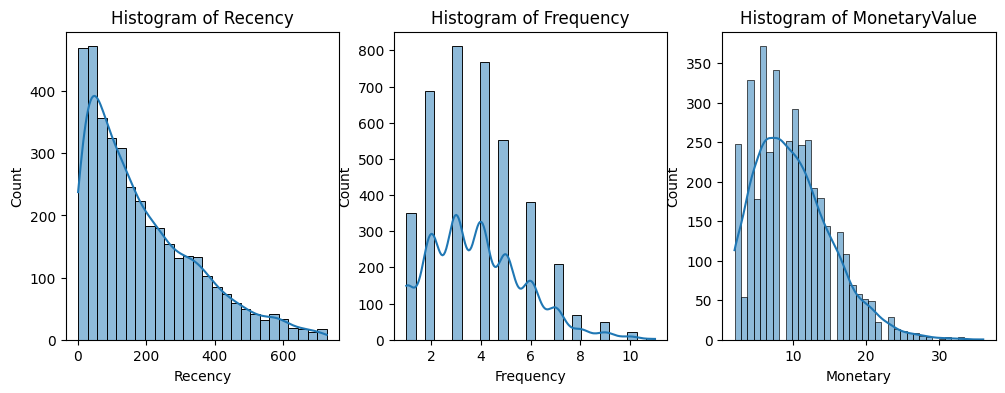

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=rfm_data, x='Recency', kde=True, ax=axes[0])
sns.histplot(data=rfm_data, x='Frequency', kde=True, ax=axes[1])
sns.histplot(data=rfm_data, x='Monetary', kde=True, ax=axes[2])

axes[0].set_title('Histogram of Recency')
axes[1].set_title('Histogram of Frequency')
axes[2].set_title('Histogram of MonetaryValue')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract the RFM features
rfm_features = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Scale the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)


In [ ]:
# Transforming the RFM table

# Imports the "stats" module from the "scipy" library and creates an empty pandas DataFrame named "Members_fix". 
# Applies the Box-Cox transformation to the "Recency", "Frequency", and "MonetaryValue" 
# columns of the "Members" DataFrame, and stores the transformed data in "Members_fix". Prints the last five rows of "Members_fix".


# Creates a new figure with a size of 12x10 and creates three subplots to display the distribution of the transformed "Recency", "Frequency", and "MonetaryValue" columns 
# using the seaborn "distplot" function. Displays the plot.

from scipy import stats
Members_rfm_data= pd.DataFrame()



In [ ]:
Members_rfm_data["Recency"], _ = stats.boxcox(rfm_data['Recency'] + 1)  # add 1 to ensure data is positive
Members_rfm_data["Frequency"], _ = stats.boxcox(rfm_data['Frequency'] + 1)
Members_rfm_data["Monetary"], _ = stats.boxcox(rfm_data['Monetary'] + 1)
Members_rfm_data.tail()

,Recency,Frequency,Monetary
3893,6.916021,1.697251,3.717401
3894,2.109200,1.288369,2.765674
3895,9.580263,0.765733,1.333773
3896,2.424580,2.594535,4.784323
3897,16.901713,1.697251,3.031685


<ipython-input-81-900bbff4962d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(Members_rfm_data['Recency'])
<ipython-input-81-900bbff4962d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(Members_rfm_data['Frequency'])
<ipython-input-81-900bbff4962d

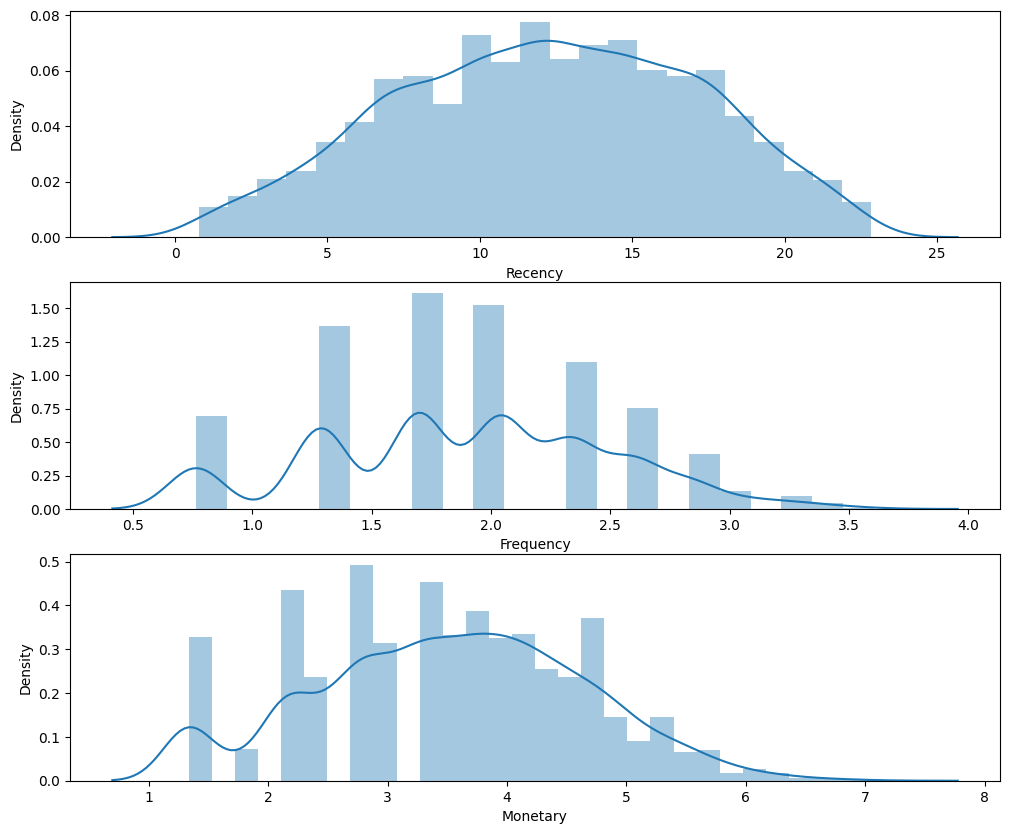

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(Members_rfm_data['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(Members_rfm_data['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(Members_rfm_data['Monetary'])
# Show the plot
plt.show()

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(Members_rfm_data)

StandardScaler()

In [ ]:
rfm_data_normalized = scaler.transform(Members_rfm_data)
# Assert that it has mean 0 and variance 1
print(rfm_data_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(rfm_data_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0.  0. -0.]
[1. 1. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

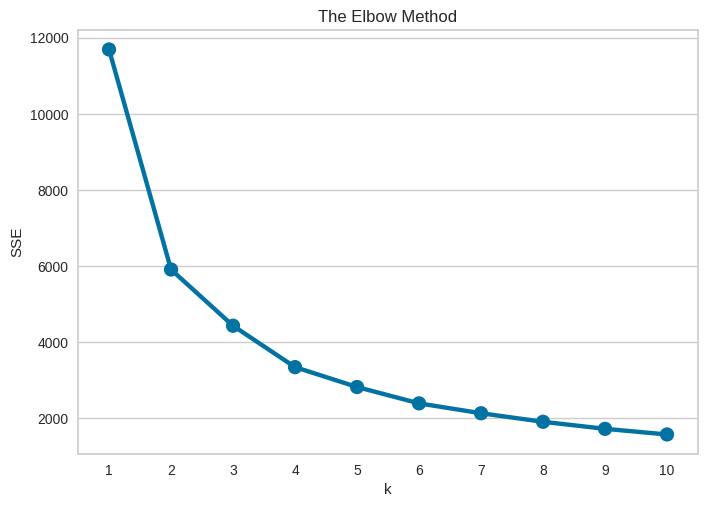

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

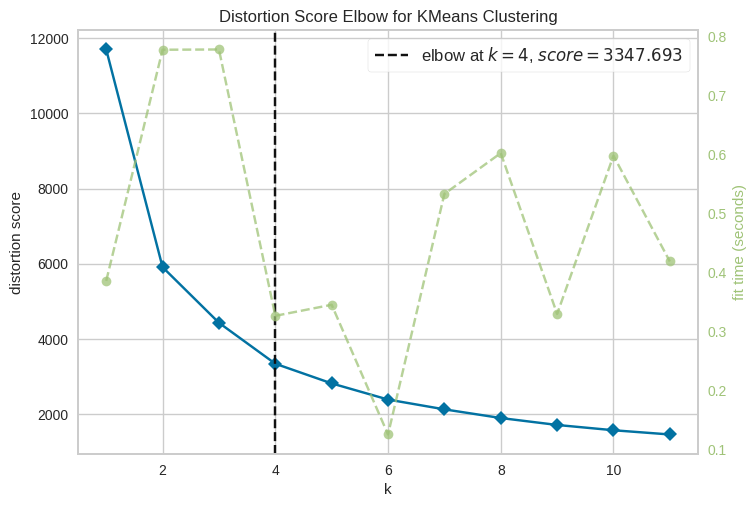

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(rfm_data_normalized)  
visualizer.show() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Member_number,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RFM_Level
Cluster,,,,,,,,,
0,845,845,845,845,845,845,845,845,845
1,1044,1044,1044,1044,1044,1044,1044,1044,1044
2,866,866,866,866,866,866,866,866,866
3,1143,1143,1143,1143,1143,1143,1143,1143,1143


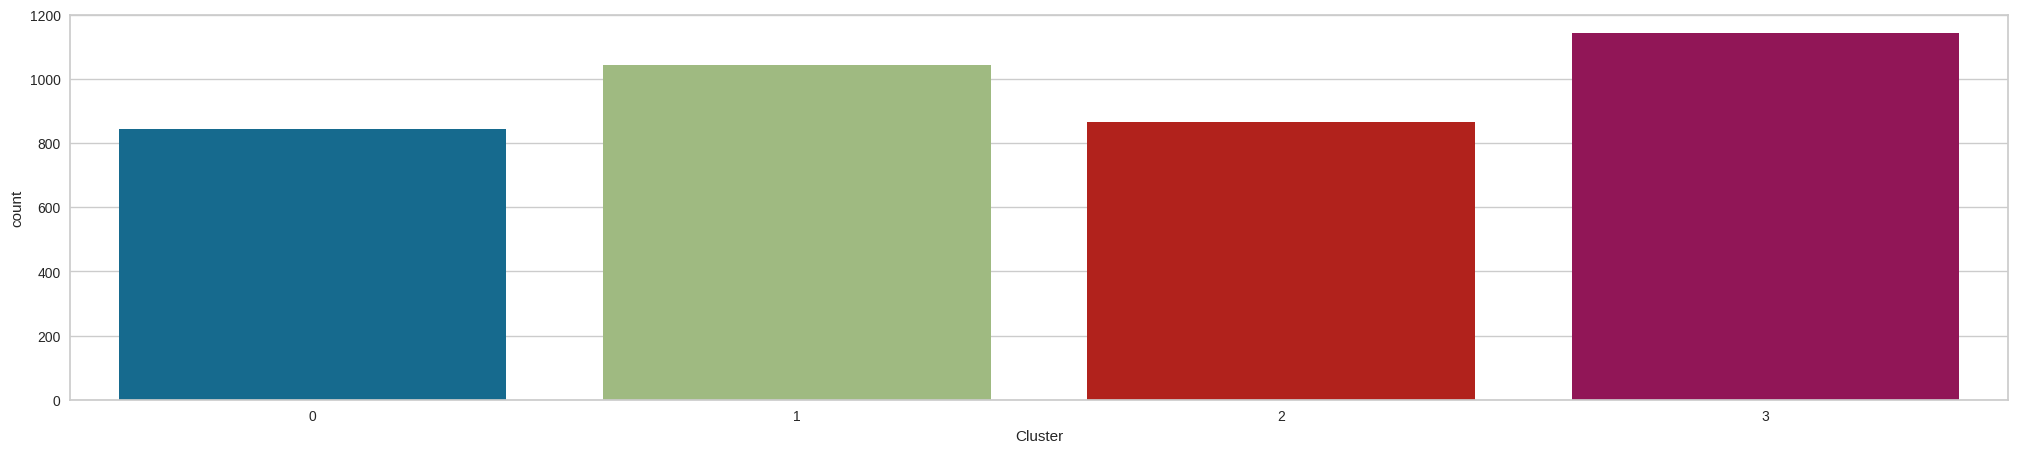

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm_data_normalized)
model.labels_.shape
rfm_data["Cluster"] = model.labels_
rfm_data.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=rfm_data)
rfm_data.groupby(['Cluster']).count()

In [ ]:
rfm_data["Cluster"] = model.labels_
rfm_data.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        343.46      1.61     3.90   845
1         86.64      6.20    16.61  1044
2         52.89      3.29     8.48   866
3        270.41      3.74     9.44  1143

<Axes: xlabel='Attribute', ylabel='Value'>

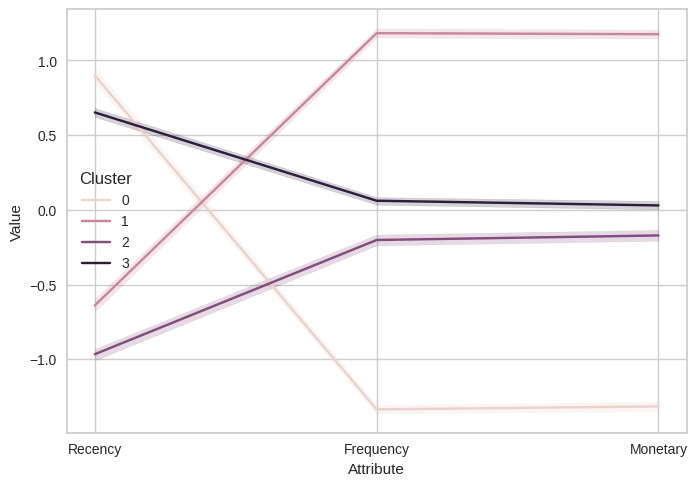

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(rfm_data_normalized, columns=['Recency', 'Frequency', 'Monetary'])
df_normalized['ID'] = rfm_data.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)

In [ ]:
# Count the number of users in each RFM label
rfm_label_counts = rfm_data['RFM_Level'].value_counts()

# Convert the Series to a DataFrame
rfm_label_counts_df = rfm_label_counts.reset_index()

# Rename the columns
rfm_label_counts_df.columns = ['RFM_Level', 'Number_of_Users']

# Display the table
print(rfm_label_counts_df)


                     RFM_Level  Number_of_Users
0                         Lost              849
1           Potential Loyalist              726
2  Customers Needing Attention              659
3                        Loyal              610
4                      At Risk              380
5                    Promising              330
6               Best Customers              285
7                  Hibernating               59


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


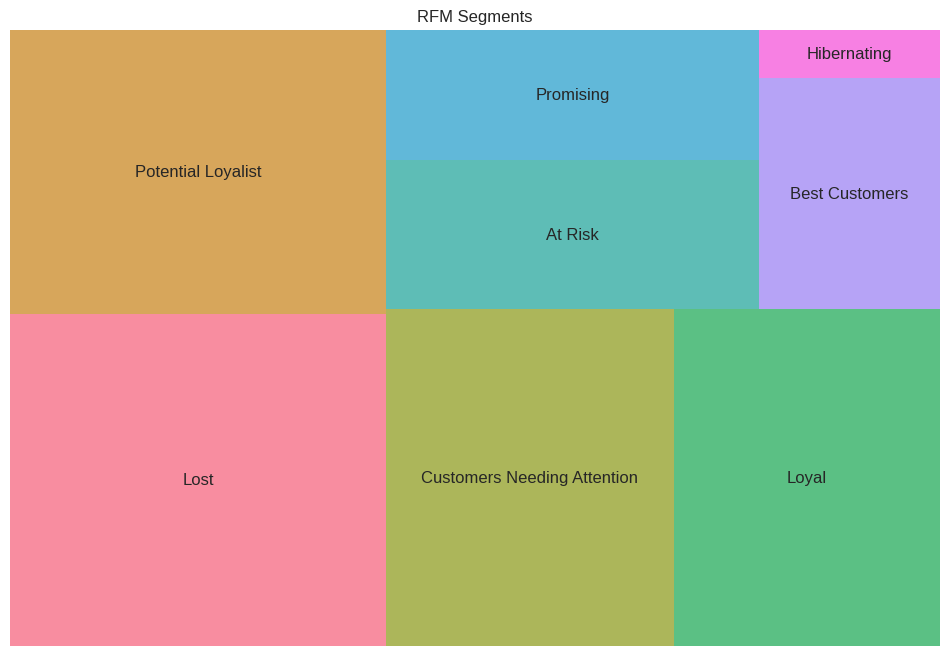

In [ ]:
!pip install squarify


import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of each RFM label
label_proportions = rfm_data['RFM_Level'].value_counts(normalize=True) * 100

# Define a color palette with different colors for each label
colors = sns.color_palette('husl', n_colors=len(label_proportions))

# Create the treemap plot
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=label_proportions.values, label=label_proportions.index, color=colors, alpha=0.8, ax=ax)

# Set the title and remove the axis
ax.set_title('RFM Segments')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering (select relevant columns and normalize)
X = rfm_data[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train the K-means model using the optimal k value (in this case, k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict cluster labels for the testing set
y_pred = kmeans.predict(X_test)

# Evaluate the performance of the model using silhouette score
score = silhouette_score(X_test, y_pred)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.39


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**EXPERIMENTATION COMPLETED**